# Longitudinal analysis; Evolution of complex networks.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

## Introduction

When we consider a temporal variable (for example, we want to know how are the relationships between different entities in our study over time) we can perform multiple types of analysis. 

In this course, we are going to see how we can study the evolution of networks in terms of (possible) changes in their topology and for the centrality of the nodes of our network. 

How much certain properties of the network vary will depend, as you can imagine, on the type of problem or application in which we are using this type of modeling.

## Graphs across time!

Here, I propose to consider a network evolving over time as a sequence of ordered networks, each corresponding to a specific point in time. This perspective treats the network as a function of the time variable, allowing us to capture its temporal dynamics and changes.

Let $G_t$ an ordered set of binary graphs across time $t$. This is:

$$
G_t(V_t, E_t),
$$
for every period of time $t \in T$.

$V_t$ correspond to a set of nodes considered in an specific time $t$, and $E_i$ is the set of edges or connection between two nodes $v_{t, i}$ and $v_{t, j}$ in $t$. 

For most of the cases, we might prefer to keep track of every node of the network across time. This is, we can define $G_t$ as

$$
G_t(V, E_t).
$$

In this case, we will be able to study how the *conections* evolves across time. In this session, we will use the last definition.

**Note:** It is also possible to define a weighted graph $G_t(V, E_t, W_t)$ across time, where $W_t$ corresponds to the weighted connections between nodes in $V$. 

In the next sub-chapter, we will learn how to perform this type of analysis via a simple example and by using NetworkX lib.

## Application in NetworkX

### Dependencies & data loading

In [2]:
def compute_features_from_graph(G):
  d_features = {
    'mean_degree' : np.mean(list(dict(G.degree()).values())),
    'density' : nx.density(G),
    'num_edges' : G.number_of_edges(),
    'num_connected_components' : nx.number_connected_components(G),
    'mean_clustering_coef' : nx.average_clustering(G),
    'num_triangles' : np.mean(list(dict(nx.triangles(G)).values()))
  }
  return d_features

In [3]:
def example_create_tensor():
  N = 10 # num nodos

  l_edges = list([
    [(0,1),(1,2),(0,2),(0,3),(2,3),(3,4),(5,6),(2,6),(6,9),(7,8),(7,9),(8,9)],
    [(0,1),(1,2),(0,2),(0,3),(2,3),(3,4),(5,6),(2,6),(6,9),(7,8),(7,9),(0,4)],
    [(0,1),(1,2),(0,2),(0,3),(2,3),(3,4),(5,6),(2,6),(6,9),(7,8),(1,9),(5,9)],
    [(0,1),(1,2),(0,2),(0,3),(3,4),(5,6),(2,6),(6,9),(7,8),(1,9),(5,9)],
    [(0,1),(1,2),(3,4),(5,6),(2,6),(6,9),(7,8),(1,9),(0,2)],
    [(0,1),(3,4),(3,6),(5,6),(2,6),(6,9),(7,8),(1,9),(0,2)],
    ])
  
  T = len(l_edges) # num steps

  A_T = np.zeros(shape=(T,N,N), dtype=np.int8)
  for i in range(len(l_edges)):
    for edge in l_edges[i]:
      A_T[i, edge[0], edge[1]] = 1;
      A_T[i, edge[1], edge[0]] = 1;

  return A_T

### Simulation of simple network as a binary graph across time

In [4]:
A_T = example_create_tensor()

In [5]:
T = A_T.shape[0]
N = A_T.shape[1]
print("# steps:", T)
print("# nodes:", N)

# steps: 6
# nodes: 10


Creating list of graphs `l_G` from adjacency matrices

In [6]:
l_G = [nx.Graph(A_T[i,:,:]) for i in range(T)]

Visualization pf graphs and dissimilarity matrices across time

In [7]:
pos = nx.spring_layout(l_G[0], iterations=100, seed=0)

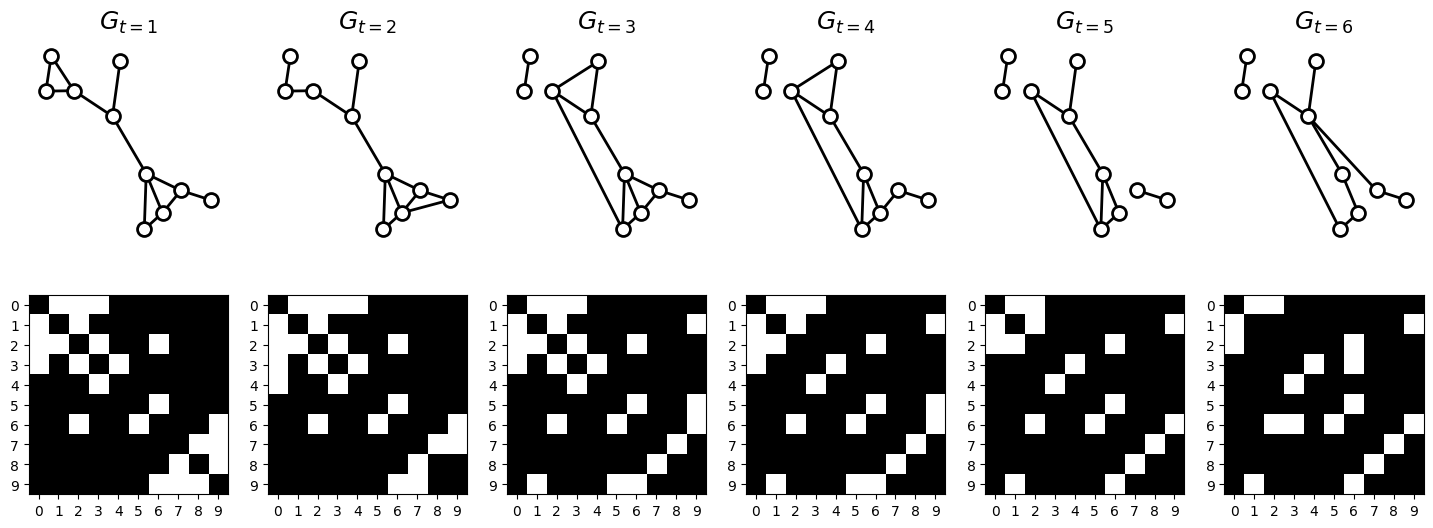

In [8]:
fig, axs = plt.subplots(figsize=(3*T,6), facecolor="w", nrows=2, ncols=T)
for i in range(T):
  # graph visualization
  nx.draw_networkx_nodes(
      l_G[i], pos, node_color='white', linewidths=2, 
      edgecolors='k', ax=axs[0][i], node_size=100)
  nx.draw_networkx_edges(l_G[i], pos, width=2, ax=axs[0][i])
  axs[0][i].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
  axs[0][i].set_title("$G_{t=%i}$" % (i+1), fontsize=18)
  
  # adjacency matrix
  axs[1][i].imshow(A_T[i,:,:], cmap="Greys_r")
  axs[1][i].imshow(A_T[i,:,:], cmap="Greys_r")
  axs[1][i].set_xticks(range(N)); axs[1][i].set_yticks(range(N));

### Analysis of topology metrics across time

In [9]:
l_features = [compute_features_from_graph(l_G[i]) for i in range(T)]

In [10]:
df_features = pd.DataFrame(l_features)
df_features

,mean_degree,density,num_edges,num_connected_components,mean_clustering_coef,num_triangles
0,2.4,0.266667,12,1,0.466667,0.9
1,2.4,0.266667,12,1,0.350000,0.9
2,2.4,0.266667,12,2,0.333333,0.9
3,2.2,0.244444,11,2,0.266667,0.6
4,1.8,0.200000,9,3,0.166667,0.3
5,1.8,0.200000,9,2,0.000000,0.0


In [11]:
n_features = len(df_features.columns)

In [12]:
l_notation_metric = {
    'mean_degree' : r'$deg$',
    'density' : r'$d$',
    'num_edges' : r'$E$',
    'num_connected_components' : r'$c$',
    'mean_clustering_coef' : r'$\langle C \rangle$',
    'num_triangles' : r'$\# \Delta$'
}

### Visualization of traces across time

Text(0.5, 0, 'Step $i$')

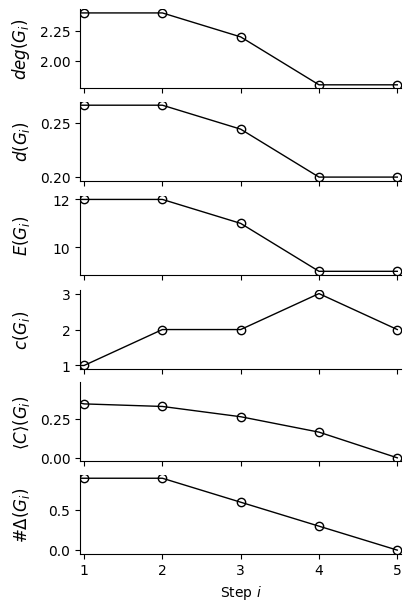

In [13]:
fig, axs = plt.subplots(
    facecolor="w", figsize=(4,n_features*1), 
    nrows=n_features, ncols=1, constrained_layout=True,
    sharex=True
    )
for i in range(n_features):
  axs[i].plot(
      df_features[df_features.columns.values[i]], 
      marker="o", color="k", fillstyle='none', lw=1)
  metric_name = df_features.columns.values[i]
  axs[i].set_ylabel("%s$(G_i)$" % l_notation_metric[metric_name], fontsize=12)
  axs[i].spines[['right', 'top']].set_visible(False)
  axs[i].set_xticks(range(1,n_features+1)); #axs[i].set_yticks([])
  axs[i].set_xlim([0.95, len(df_features.index)-0.95])
  axs[i].yaxis.set_label_coords(-0.15,0.5)

axs[-1].set_xlabel("Step $i$")

**Note:** For an increasing $T$, we can use these features to predict future states of the network! 

Do you have other ideas about the use these traces?

---